In [4]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# importing or loading the dataset
dataset = pd.read_csv('Wine.csv')
dataset.head()
  

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


<AxesSubplot:>

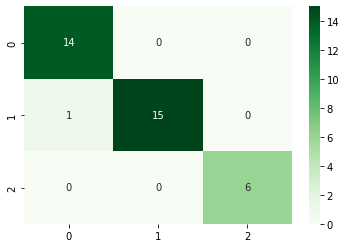

In [11]:

# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values


# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test)

# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

  
cm = confusion_matrix(y_test, y_pred)
cm

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap = 'Greens')

In [12]:
cr = classification_report(y_test, y_pred)
cr

'              precision    recall  f1-score   support\n\n           1       0.93      1.00      0.97        14\n           2       1.00      0.94      0.97        16\n           3       1.00      1.00      1.00         6\n\n    accuracy                           0.97        36\n   macro avg       0.98      0.98      0.98        36\nweighted avg       0.97      0.97      0.97        36\n'